In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import reuters

In [2]:
# Download the Reuters dataset
nltk.download('reuters')
nltk.download('punkt')

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Load documents from the Reuters dataset
documents = [reuters.raw(file_id) for file_id in reuters.fileids()]

In [4]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=2)
X = vectorizer.fit_transform(documents)

In [5]:
# K-Means clustering
true_k = 10  # Number of clusters
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=10)
model.fit(X)

KMeans(max_iter=100, n_clusters=10, n_init=10)

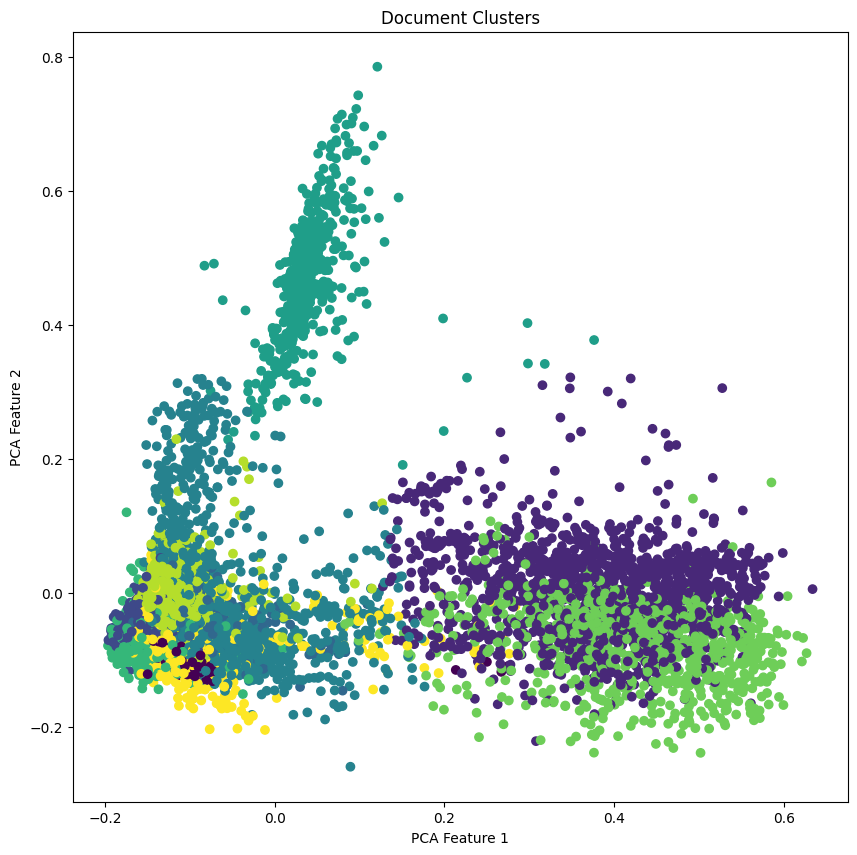

In [6]:
# Reduce dimensions with PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot the clusters
plt.figure(figsize=(10, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model.labels_, cmap='viridis')
plt.title("Document Clusters")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.show()
